# RMS Titanic

The RMS Titanic was known as the unsinkable ship and was the largest, most luxurious
passenger ship of its time. Sadly, the British ocean liner sank on April 15, 1912,
killing over 1500 people while just 705 survived.

Exploratory Data Analysis (EDA) of the titanic dataset
See https://www.encyclopedia-titanica.org/

We are using the original dataset: https://github.com/alexisperrier/packt-aml/blob/master/ch4/original_titanic.csv

The data consists of demographic and traveling information for 1,309 of the Titanic
passengers, and the goal is to predict the survival of these passengers.

## Libraries

In [1]:
# Imports

from matplotlib.pyplot import rcParams
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline
rcParams["figure.figsize"] = 10, 8
sns.set(style="whitegrid", palette="muted", rc={"figure.figsize": (15, 10)})

## Load dataset

In [2]:
# Load data as Pandas dataframe
eda = pd.read_csv("datasets/original_titanic.csv")

In [3]:
# First 5 colums (to check whether the dataset was loaded)
eda.head()

pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

### First impressions
Ordering: The dataset is ordered by pclass, then name.

Variables (colums):

* pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
	* A proxy for socio-economic status (SES)
	* 1st = Upper
	* 2nd = Middle
	* 3rd = Lower
* survival: A Boolean indicating whether the passenger survived or not (0 = No; 1 = Yes)
* name: A field rich with personal information containing titles and family names
* sex: male/female
* age: Age
* sibsp: Number of siblings/spouses aboard
	* sibling = brother, sister, stepbrother, stepsister
	* spouse = husband, wife (mistresses and fiancés were ignored)
* parch: Number of parents/children aboard
	* parent = mother, father
	* child = daughter, son, stepdaughter, stepson
	* Some children travelled only with a nanny, therefore parch=0 for them.
* ticket: Ticket number
* fare: Passenger fare (in British Pound)
* cabin: Location of the cabin
* embarked: Port of embarkation
	* C = Cherbourg
	* Q = Queenstown
	* S = Southampton
* boat: Lifeboat
* body: Body Identification Number
* home.dest: Home/destination


### Questions

* Did class have an effect on survival?
* Did the location of the cabin influence chances of survival?
* Did the cities which people joined the ship from have any impact?
* Did the amount passengers paid for their tickets have any baring on the overall survival rate?
* Did those travelling alone have a greater mortality rate than those with a family?
* What was the effect of age?
* Did women and children have greater odds of surviving?
* Did families have more chance of survival (as a whole)?

## Explorations

In [4]:
# Count the number of rows and columns in the data set
eda.shape

(1309, 14)

In [5]:
# Look at the statistical details
eda.describe()

pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881138     0.498854     0.385027   
std       0.837836     0.486055    14.413493     1.041658     0.865560   
min       1.000000     0.000000     0.170000     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000

The max price/fare a passenger paid for a ticket in this data set was 512.3292 British
pounds, and the minimum price/fare was 0 British pounds.

We can also see that there is some missing data for the age column. It lists a count of 1046,
less than 1309 (the number of passengers in this data set).

The mean age is 29.88 and the oldest passenger in this data set was 80 years old, while the
youngest was only .17 years old (about 2 months).

In [6]:
# Get a count of the number of survivors in this set
eda["survived"].value_counts()

0    809
1    500
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

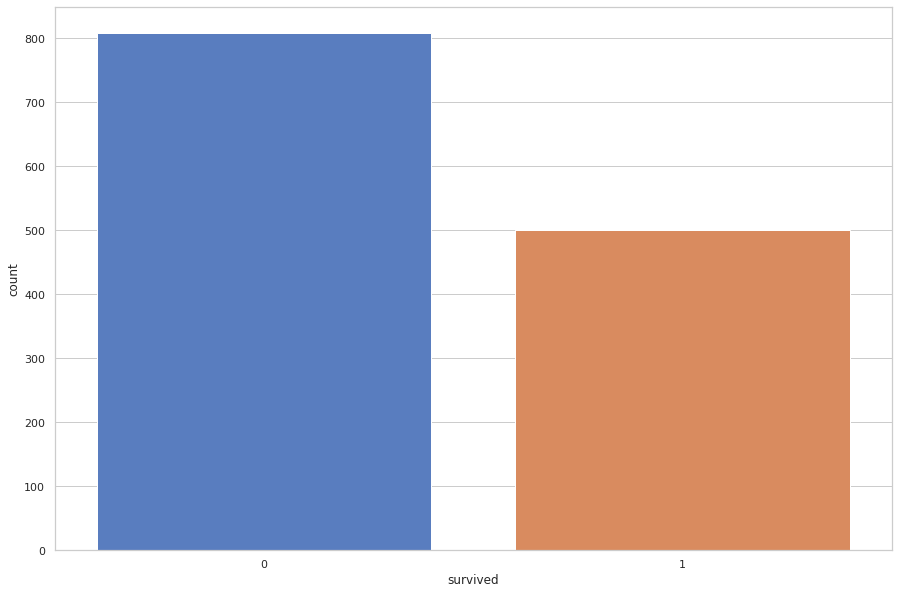

In [7]:
# Visualize the count of number of survivors
sns.countplot(x="survived", data=eda, label="Count")

### Plots

array([[<AxesSubplot:title={'center':'pclass'}>,
        <AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'sibsp'}>,
        <AxesSubplot:title={'center':'parch'}>,
        <AxesSubplot:title={'center':'fare'}>],
       [<AxesSubplot:title={'center':'body'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

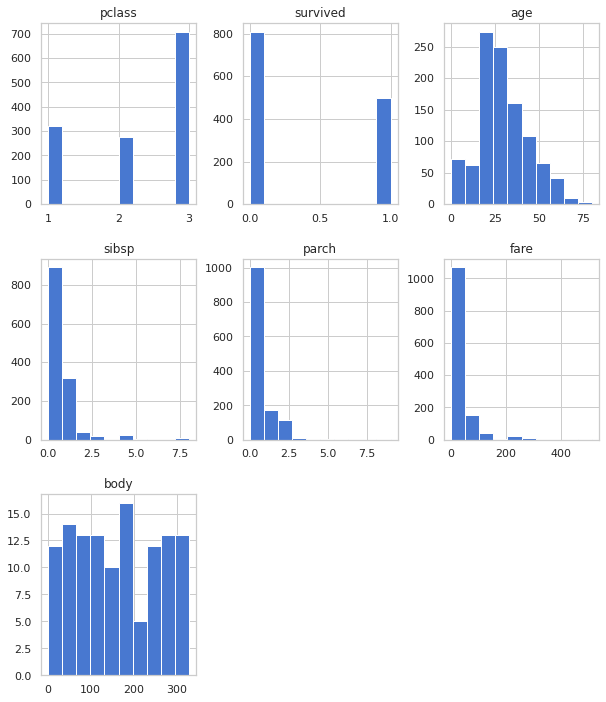

In [8]:
num = eda.select_dtypes(include=["int", "float"])
num.hist(figsize=(10, 12))

Most of the people that were on the titanic were aged between 20 and 50.
Fare of ship was mostly below 100 but for at least one person fare was more than 500.

In [9]:
with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
    display(eda.describe(include="all").T)

count unique                   top freq        mean        std  \
pclass     1309.0    NaN                   NaN  NaN    2.294882   0.837836   
survived   1309.0    NaN                   NaN  NaN    0.381971   0.486055   
name         1309   1307  Connolly, Miss. Kate    2         NaN        NaN   
sex          1309      2                  male  843         NaN        NaN   
age        1046.0    NaN                   NaN  NaN   29.881138  14.413493   
sibsp      1309.0    NaN                   NaN  NaN    0.498854   1.041658   
parch      1309.0    NaN                   NaN  NaN    0.385027    0.86556   
ticket       1309    929              CA. 2343   11         NaN        NaN   
fare       1308.0    NaN                   NaN  NaN   33.295479  51.758668   
cabin         295    186           C23 C25 C27    6         NaN        NaN   
embarked     1307      3                     S  914         NaN        NaN   
boat          486     27                    13   39         NaN        NaN   
body        121.0    NaN                   NaN  NaN  160.809917  97.696922   
home.dest     745    369          New York, NY   64         NaN        NaN   

            min     25%      50%     75%       max  
pclass      1.0     2.0      3.0     3.0       3.0  
survived    0.0     0.0      0.0     1.0       1.0  
name        NaN     NaN      NaN     NaN       NaN  
sex         NaN     NaN      NaN     NaN       NaN  
age        0.17    21.0     28.0    39.0      80.0  
sibsp       0.0     0.0      0.0     1.0       8.0  
parch       0.0     0.0      0.0     0.0       9.0  
ticket      NaN     NaN      NaN     NaN       NaN  
fare        0.0  7.8958  14.4542  31.275  512.3292  
cabin       NaN     NaN      NaN     NaN       NaN  
embarked    NaN     NaN      NaN     NaN       NaN  
boat        NaN     NaN      NaN     NaN       NaN  
body        1.0    72.0    155.0   256.0     328.0  
home.dest   NaN     NaN      NaN     NaN       NaN

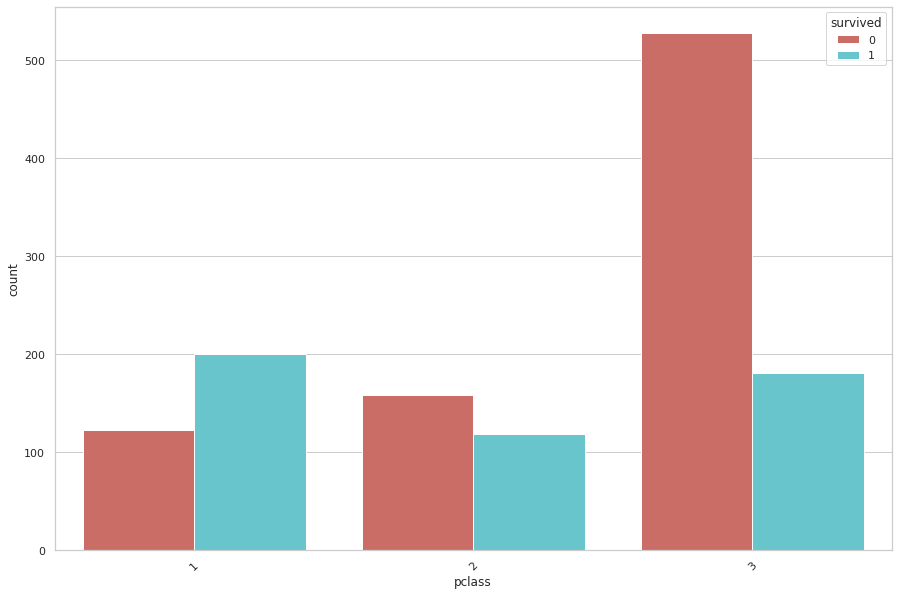

In [10]:
# pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)
sns.countplot(x="pclass", data=eda, palette="hls", hue="survived")
plt.xticks(rotation=45)
plt.show()

- A man is not likely to survive
- Third class is most likely to not survive
- If you embarked from Southampton (S), you are less likely to survive
- If you have 0 siblings or spouses on board, you are not likely to survive

In [11]:
# Look at survival rate by sex
eda.groupby("sex")[["survived"]].mean()

survived
sex             
female  0.727468
male    0.190985

In [12]:
# Look at survival rate by sex and class
eda.pivot_table("survived", index="sex", columns="pclass")

pclass         1         2         3
sex                                 
female  0.965278  0.886792  0.490741
male    0.340782  0.146199  0.152130

Females in first class had a survival rate of about 96.5%, meaning the majority of them
survived.
Males in third class had the lowest survival rate at about 15.2%, meaning the majority
of them did not survive.

<AxesSubplot:xlabel='sex'>

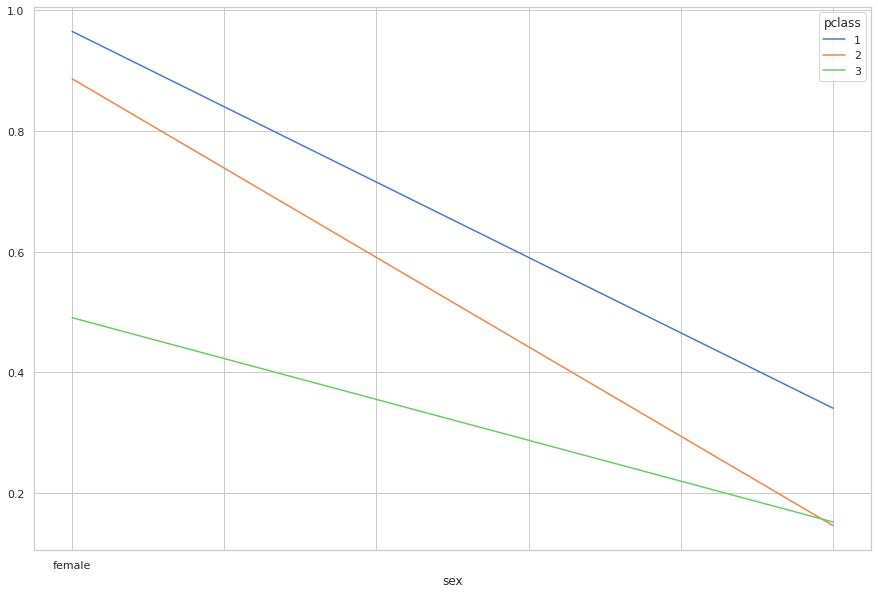

In [13]:
eda.pivot_table("survived", index="sex", columns="pclass").plot()

<AxesSubplot:xlabel='pclass', ylabel='survived'>

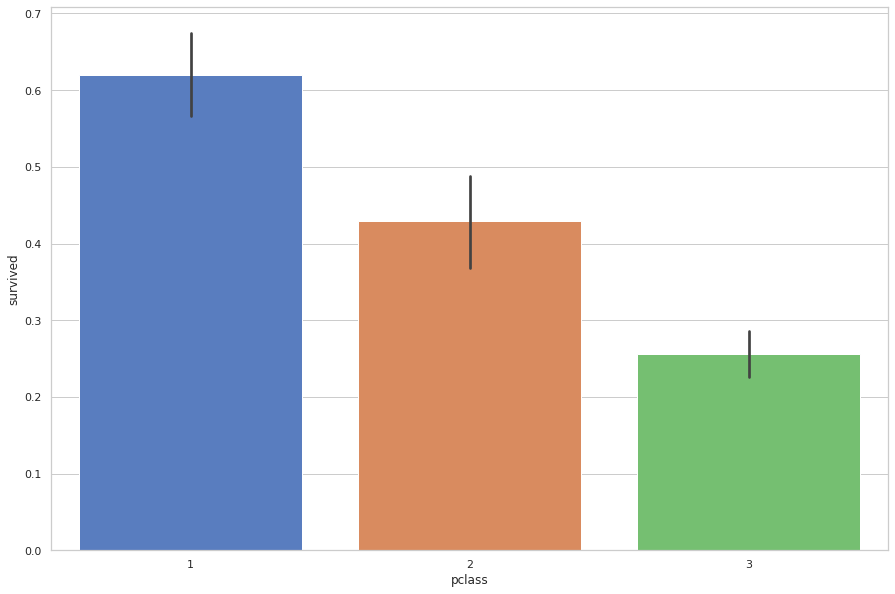

In [14]:
# Plot the survival rate of each class.
sns.barplot(x="pclass", y="survived", data=eda)

In [15]:
# Look at survival rate by sex, age and class
age = pd.cut(eda["age"], [0, 18, 80])
eda.pivot_table("survived", ["sex", age], "pclass")

pclass                  1         2         3
sex    age                                   
female (0, 18]   0.923077  0.952381  0.534483
       (18, 80]  0.966667  0.878049  0.436170
male   (0, 18]   0.750000  0.523810  0.208333
       (18, 80]  0.328671  0.087591  0.158845

Women in first class that were 18 and older had the highest survival rate at 96.7%,
while men 18 and older in second class had the lowest survival rate of 8.8%

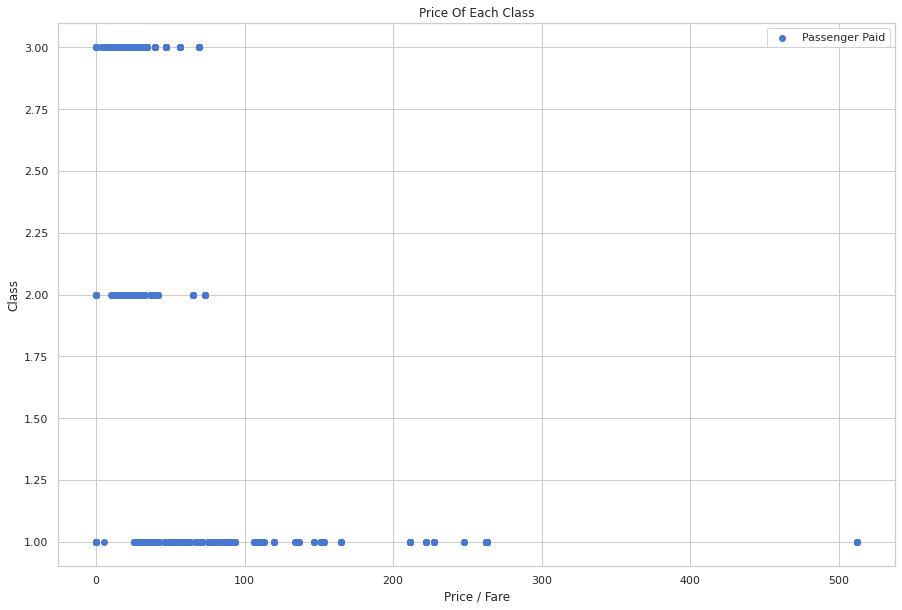

In [16]:
# Plot the fares of each pclass
plt.scatter(eda["fare"], eda["pclass"], label="Passenger Paid")
plt.ylabel("Class")
plt.xlabel("Price / Fare")
plt.title("Price Of Each Class")
plt.legend()
plt.show()

Hmmmmm.